# Proyecto analisis dataset CSV

## Nombre: Erick Mora

## Dataset:
#### The Complete Pokemon Dataset
#### Data on more than 800 Pokemon from all 7 Generations.

#### El dataset escogido corresponde a datos de los Pokemon de las regiones de Kanto, Johto, Hoenn, Sinnoh, Unova, Kalos y Alola

#### No se incluyen los Pokemon mega ni formas de Alola


**Columnas:** 

* abilities
* attack
* base_egg_steps
* base_happiness
* base_total
* capture_rate
* classfication
* defense
* experience_growth
* height_m
* hp
* japanese_name
* name
* percentage_male
* pokedex_number
* sp_attack
* sp_defense
* speed
* type1
* type2
* weight_kg
* generation
* is_legendary

### Librerias:

In [1]:
import pandas as pd
import os
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
import math

### Dataset:

In [13]:
path_dataset = "./data/dataset_pokemon.csv"
df_pokemon =  pd.read_csv(path_dataset)
df_pokemon

a = df_pokemon["against_bug"][0]
type(a)

numpy.float64

## Graficos

### 1) Pokemon con mayor ataque

Text(0.5, 1.0, 'Pokemon con mayor ataque')

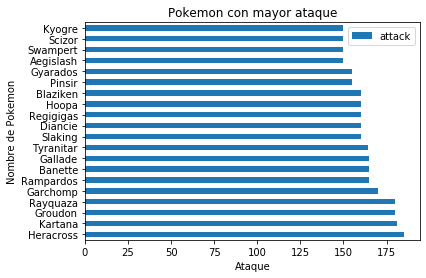

In [3]:
df_columnas = ['name', 'attack']
valores = df_pokemon[df_columnas].sort_values(by='attack', ascending = False).head(20)
valores.index = valores['name']
valores.plot( kind='barh')
plt.ylabel('Nombre de Pokemon')
plt.xlabel('Ataque')
plt.title('Pokemon con mayor ataque')
plt.show()

### 2) Pokemon con mayor peso

Text(0.5, 1.0, 'Pokemon con mayor peso')

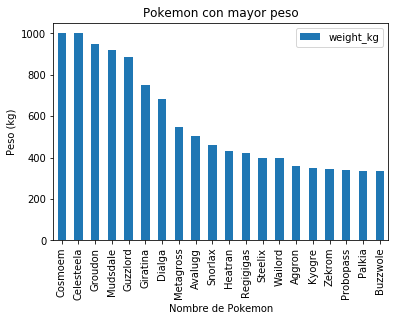

In [4]:
df_columnas = ['name', 'weight_kg']
valores = df_pokemon[df_columnas].sort_values(by='weight_kg', ascending = False).head(20)
valores.index = valores['name']
valores.plot( kind='bar')
plt.xlabel('Nombre de Pokemon')
plt.ylabel('Peso (kg)')
plt.title('Pokemon con mayor peso')
plt.show()

### 3) Pokemon más veloces

Text(0.5, 1.0, 'Pokemon más veloces')

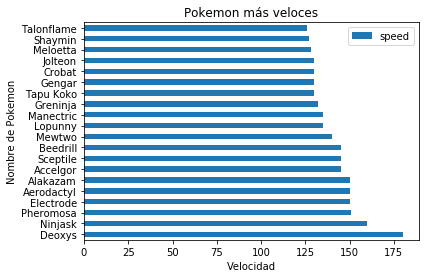

In [5]:
df_columnas = ['name', 'speed']
valores = df_pokemon[df_columnas].sort_values(by='speed', ascending = False).head(20)
valores.index = valores['name']
valores.plot( kind='barh')
plt.ylabel('Nombre de Pokemon')
plt.xlabel('Velocidad')
plt.title('Pokemon más veloces')
plt.show()

### 4) Pokemon clasificados por ratio de captura

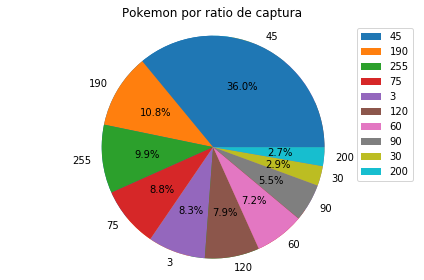

In [6]:
pokemon = df_pokemon.groupby("capture_rate")["name"].size().sort_values(ascending=False).head(10)

patches,texts=plt.pie(pokemon,startangle=90)
plt.pie(pokemon,labels=pokemon.index,autopct='%1.1f%%')
plt.legend(patches,pokemon.index,loc="best")
plt.axis("equal")
plt.title("Pokemon por ratio de captura")
plt.tight_layout()
plt.show()

### 5) Pokemon clasificados por generacion

generation
5    156
1    151
3    135
4    107
2    100
7     80
6     72
Name: name, dtype: int64


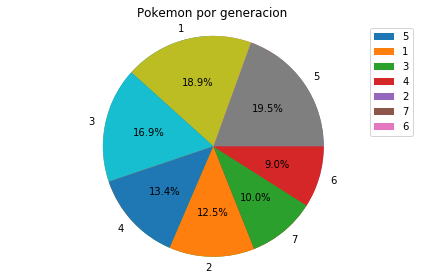

In [7]:

pokemon = df_pokemon.groupby("generation")["name"].size().sort_values(ascending=False).head(7)
print(pokemon)
patches,texts=plt.pie(pokemon,startangle=90)
plt.pie(pokemon,labels=pokemon.index,autopct='%1.1f%%')
plt.legend(patches,pokemon.index,loc="best")
plt.axis("equal")
plt.title("Pokemon por generacion")
plt.tight_layout()
plt.show()

### 6) Pokemon clasificados por tipo principal

type1
water       114
normal      105
grass        78
bug          72
psychic      53
fire         52
rock         45
electric     39
poison       32
ground       32
dark         29
fighting     28
dragon       27
ghost        27
steel        24
ice          23
fairy        18
flying        3
Name: name, dtype: int64


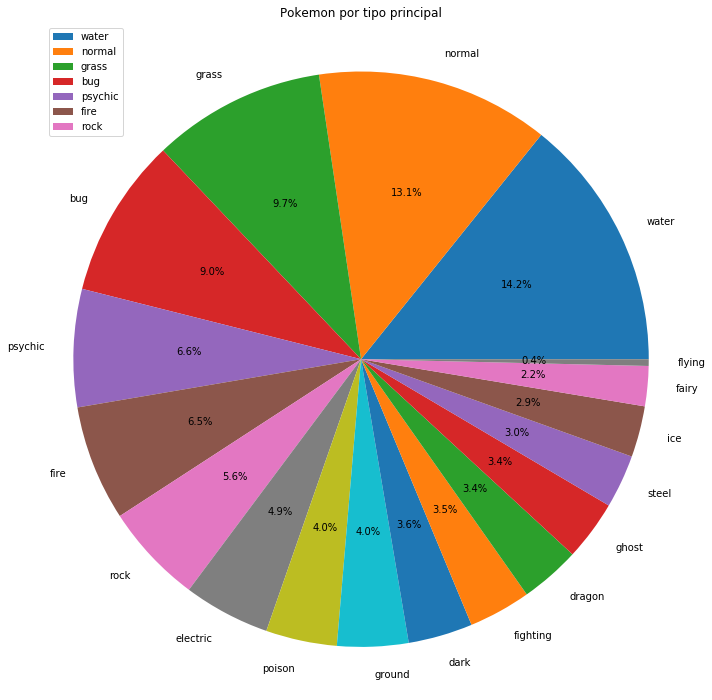

In [8]:
pokemon = df_pokemon.groupby("type1")["name"].size().sort_values(ascending=False).head(20)
print(pokemon)

plt.figure(figsize = (10, 10)) 
plt.pie(pokemon,labels=pokemon.index,autopct='%1.1f%%')
plt.legend(patches,pokemon.index,loc="best")
plt.axis("equal")
plt.title("Pokemon por tipo principal")
plt.tight_layout()
plt.show()

### 7) Pokemon de tipo hada por generacion

generation
6    13
7    12
2     8
3     5
1     5
5     2
4     2
Name: name, dtype: int64


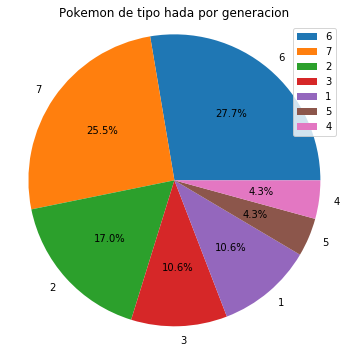

In [9]:
pokemon = df_pokemon[(df_pokemon['type1']=='fairy') | (df_pokemon['type2']=='fairy')].groupby("generation")["name"].size().sort_values(ascending=False).head(20)
print(pokemon)
plt.figure(figsize = (5, 5)) 
plt.pie(pokemon,labels=pokemon.index,autopct='%1.1f%%')
plt.legend(patches,pokemon.index,loc="best")
plt.axis("equal")
plt.title("Pokemon de tipo hada por generacion")
plt.tight_layout()
plt.show()

### 8) Pokemon con más puntos de salud de la region de Kalos

Text(0.5, 1.0, 'Pokemon con más puntos de salud de la region de Kalos')

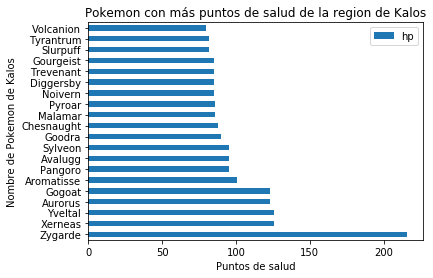

In [10]:
df_columnas = ['name', 'hp']
valores = df_pokemon[df_columnas][df_pokemon['generation']==6].sort_values(by='hp', ascending = False).head(20)
valores.index = valores['name']
valores.plot( kind='barh')
plt.ylabel('Nombre de Pokemon de Kalos')
plt.xlabel('Puntos de salud')
plt.title('Pokemon con más puntos de salud de la region de Kalos')
plt.show()

### 9) Pokemon más lentos de la region de Kanto

Text(0.5, 1.0, 'Pokemon más lentos de la region de Kanto')

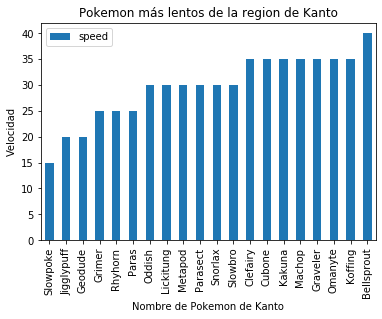

In [11]:
df_columnas = ['name', 'speed']
valores = df_pokemon[df_columnas][df_pokemon['generation']==1].sort_values(by='speed', ascending = True).head(20)
valores.index = valores['name']
valores.plot( kind='bar')
plt.xlabel('Nombre de Pokemon de Kanto')
plt.ylabel('Velocidad')
plt.title('Pokemon más lentos de la region de Kanto')
plt.show()

### 10) Pokemon más livianos de la region de Hoenn

Text(0.5, 1.0, 'Pokemon más livianos de la region de Hoenn')

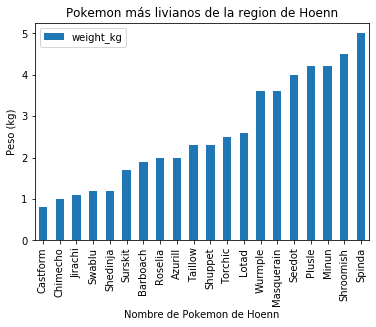

In [12]:
df_columnas = ['name', 'weight_kg']
valores = df_pokemon[df_columnas][df_pokemon['generation']==3].sort_values(by='weight_kg', ascending = True).head(20)
valores.index = valores['name']
valores.plot( kind='bar')
plt.xlabel('Nombre de Pokemon de Hoenn')
plt.ylabel('Peso (kg)')
plt.title('Pokemon más livianos de la region de Hoenn')
plt.show()

### 11) Pokemon más pequeños de la region de Alola

Text(0.5, 1.0, 'Pokemon más pequeños de la region de Alola')

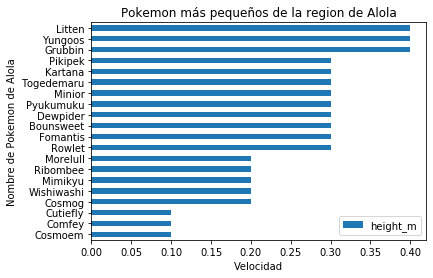

In [13]:
df_columnas = ['name', 'height_m']
valores = df_pokemon[df_columnas][df_pokemon['generation']==7].sort_values(by='height_m', ascending = True).head(20)
valores.index = valores['name']
valores.plot( kind='barh')
plt.ylabel('Nombre de Pokemon de Alola')
plt.xlabel('Velocidad')
plt.title('Pokemon más pequeños de la region de Alola')
plt.show()

### 12) Pokemon legendarios por generacion

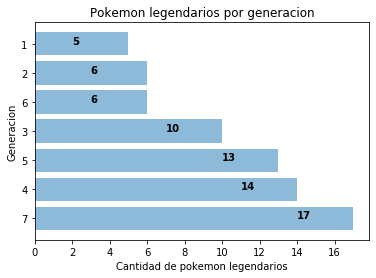

In [14]:

serie_ingresos_anio = df_pokemon.groupby('generation').sum()['is_legendary'].sort_values(ascending=False).head(7)
y_pos = np.arange(len(serie_ingresos_anio))
plt.barh(y_pos, serie_ingresos_anio.values, align='center', alpha=0.5)
plt.yticks(y_pos, serie_ingresos_anio.index)
for i, v in enumerate(serie_ingresos_anio.values):
    plt.text(v-3, i , str(v), color='black', fontweight='bold')
plt.xlabel('Cantidad de pokemon legendarios')
plt.ylabel('Generacion')
plt.title('Pokemon legendarios por generacion')
plt.show()

### 13) Pokemon por amistad base

base_happiness
70     667
35      69
0       36
100     14
140     10
90       5
Name: name, dtype: int64


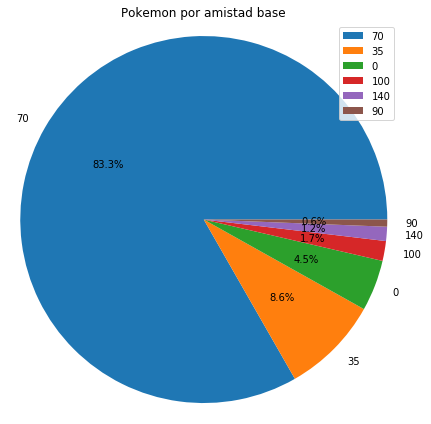

In [15]:
pokemon = df_pokemon.groupby("base_happiness")["name"].size().sort_values(ascending=False).head(7)
print(pokemon)
plt.figure(figsize = (6, 6)) 
plt.pie(pokemon,labels=pokemon.index,autopct='%1.1f%%')
plt.legend(patches,pokemon.index,loc="best")
plt.axis("equal")
plt.title("Pokemon por amistad base")
plt.tight_layout()
plt.show()

### 14) Pokemon por pasos base para eclosion de huevo
##### Definido a partir de la septima generacion

base_egg_steps
5120     436
3840     140
6400      55
30720     49
10240     42
7680      26
2560      22
20480     16
8960      13
1280       2
Name: name, dtype: int64


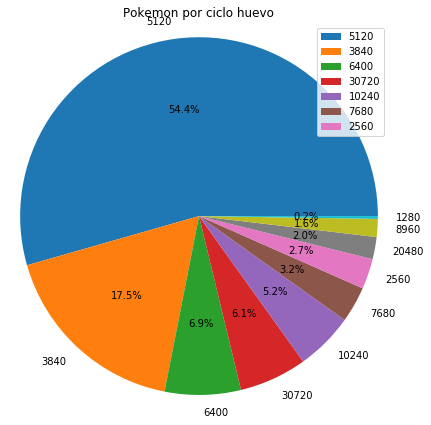

In [16]:
pokemon = df_pokemon.groupby("base_egg_steps")["name"].size().sort_values(ascending=False).head(10)
print(pokemon)
plt.figure(figsize = (6, 6)) 
plt.pie(pokemon,labels=pokemon.index,autopct='%1.1f%%')
plt.legend(patches,pokemon.index,loc="best")
plt.axis("equal")
plt.title("Pokemon por ciclo huevo")
plt.tight_layout()
plt.show()

### 15) Pokemon legendarios con más puntos de salud

Text(0.5, 1.0, 'Pokemon legendarios con más puntos de salud')

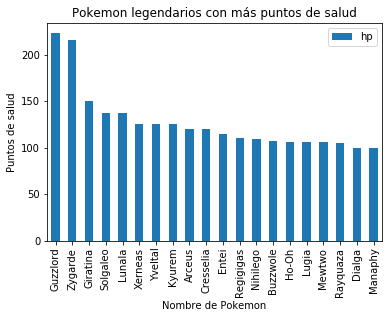

In [17]:
df_columnas = ['name','hp']
valores = df_pokemon[df_columnas][df_pokemon['is_legendary']==1].sort_values(by='hp', ascending = False).head(20)
valores.index = valores['name']
valores.plot( kind='bar')
plt.xlabel('Nombre de Pokemon')
plt.ylabel('Puntos de salud')
plt.title('Pokemon legendarios con más puntos de salud')
plt.show()

### 16) Pokemon legendarios más veloces

Text(0.5, 1.0, 'Pokemon legendarios más veloces')

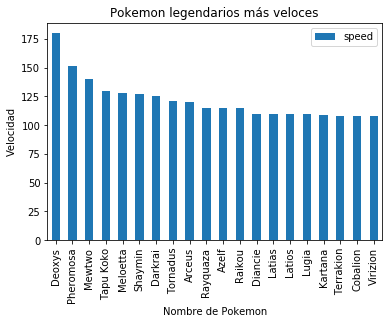

In [18]:
df_columnas = ['name','speed']
valores = df_pokemon[df_columnas][df_pokemon['is_legendary']==1].sort_values(by='speed', ascending = False).head(20)
valores.index = valores['name']
valores.plot( kind='bar')
plt.xlabel('Nombre de Pokemon')
plt.ylabel('Velocidad')
plt.title('Pokemon legendarios más veloces')
plt.show()

### 17) Pokemon con más puntos base
##### Considerando la suma de puntos de salud, ataque, defensa, ataque especial, defensa especial y velocidad

Text(0.5, 1.0, 'Pokemon con más puntos base')

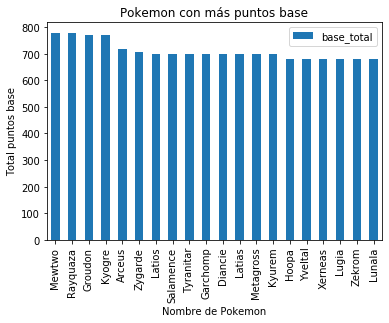

In [19]:
df_columnas = ['name','base_total']
valores = df_pokemon[df_columnas].sort_values(by='base_total', ascending = False).head(20)
valores.index = valores['name']
valores.plot( kind='bar')
plt.xlabel('Nombre de Pokemon')
plt.ylabel('Total puntos base')
plt.title('Pokemon con más puntos base')
plt.show()

### 18) Pokemon legendarios de la region Sinnoh ordenados por ataque

Text(0.5, 1.0, 'Pokemon legendarios de la region Sinnoh ordenados por ataque')

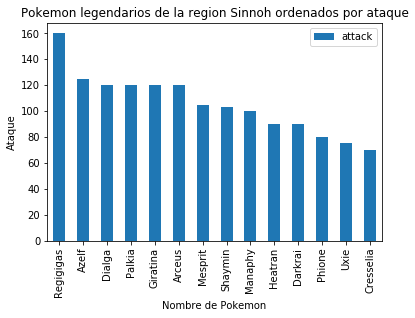

In [20]:
df_columnas = ['name','attack']
valores = df_pokemon[df_columnas][(df_pokemon['is_legendary']==1) & (df_pokemon['generation']==4)].sort_values(by='attack', ascending = False).head(20)
valores.index = valores['name']
valores.plot( kind='bar')
plt.xlabel('Nombre de Pokemon')
plt.ylabel('Ataque')
plt.title('Pokemon legendarios de la region Sinnoh ordenados por ataque')
plt.show()

### 19) Pokemon de tipo agua de la region de Kalos ordenados por puntos base

Text(0.5, 1.0, 'Pokemon de tipo agua de la region de Kalos ordenados por puntos base')

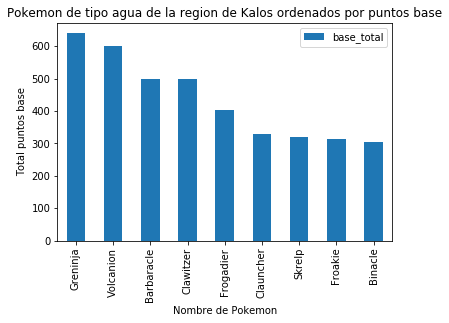

In [21]:
df_columnas = ['name','base_total']
valores = df_pokemon[df_columnas][(df_pokemon['generation']==6) & ((df_pokemon['type1']=='water') | (df_pokemon['type2']=='water'))].sort_values(by='base_total', ascending = False).head(20)
valores.index = valores['name']
valores.plot( kind='bar')
plt.xlabel('Nombre de Pokemon')
plt.ylabel('Total puntos base')
plt.title('Pokemon de tipo agua de la region de Kalos ordenados por puntos base')
plt.show()

### 20) Pokemon de tipo fuego de la region de Kanto ordenados por puntos base

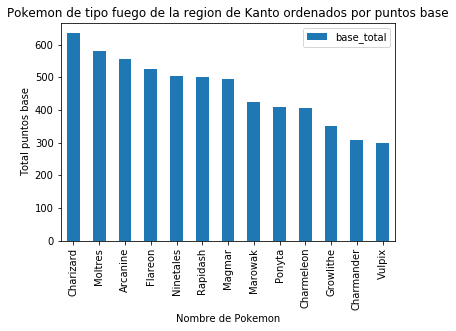

In [25]:
df_columnas = ['name','base_total']
valores = df_pokemon[df_columnas][(df_pokemon['generation']==1) & ((df_pokemon['type1']=='fire') | (df_pokemon['type2']=='fire'))].sort_values(by='base_total', ascending = False).head(20)
valores.index = valores['name']
valores.plot( kind='bar')
plt.xlabel('Nombre de Pokemon')
plt.ylabel('Total puntos base')
plt.title('Pokemon de tipo fuego de la region de Kanto ordenados por puntos base')
plt.show()